In [3]:
import pandas as pd
import numpy as np
import mpmath as mp
import matplotlib.pyplot as plt
from mpmath import *
mp.dps= 150

def define_plot_resolution():
    fig = plt.gcf()  # get current figure0

    DPI = fig.get_dpi()
#     fig.set_size_inches(1920.0 / float(DPI), 1080.0 / float(DPI))
    fig.set_size_inches(12, 8)
    ax = plt.gca()
    for tickLabel in ax.get_xticklabels()+ax.get_yticklabels():
        tickLabel.set_fontsize(29)
    ax.yaxis.label.set_size(29)
    ax.xaxis.label.set_size(29)
    ax.yaxis.offsetText.set_fontsize(29)
    ax.xaxis.offsetText.set_fontsize(29)
    return

def pd_to_array(file, column, dtype=float):
    if dtype == float:
        return np.array([mp.mpf(x) for x in file[column]], dtype=float)
    else:
        return np.array([mp.mpf(x) for x in file[column]])


mphi_lle = lambda phi, phigut, mphigut : mphigut*mp.sqrt(mp.mpf('1')+xi**2*(mp.mpf('1')-(g2(phi, phigut)/g2gut)**mp.mpf('4'))+xi**2*mp.mpf('1')/11*(mp.mpf('1')-(g1(phi, phigut)/g1gut)**mp.mpf('4')))
lambda6_lle = lambda phi, phigut, lambda6gut : lambda6gut*(g2gut/g2(phi, phigut))**mp.mpf('6')*(g2gut/g2(phi, phigut))**(mp.mpf('6')/11)
A6_lle = lambda phi, phigut, mphigut, A6gut : A6gut+mphigut*xi*(mp.mpf('6')*(mp.mpf('1')-(g2(phi, phigut)/g2gut)**mp.mpf('2'))-mp.mpf('6')/11*(mp.mpf('1')-(g1(phi, phigut)/g1gut)**mp.mpf('2')))

mphi_udd = lambda phi, phigut, mphigut : mphigut*mp.sqrt(mp.mpf('1')+xi**2*mp.mpf('-8')/9*(mp.mpf('1')-(g3(phi, phigut)/g3gut)**mp.mpf('4'))+xi**2*mp.mpf('4')/99*(mp.mpf('1')-(g1(phi, phigut)/g1gut)**mp.mpf('4')))
lambda6_udd = lambda phi, phigut, lambda6gut : lambda6gut*(g3gut/g3(phi, phigut))**(mp.mpf('-8')/9*mp.mpf('6'))*(g3gut/g3(phi, phigut))**(mp.mpf('6')*mp.mpf('4')/99)
A6_udd = lambda phi, phigut, mphigut, A6gut : A6gut+mphigut*xi*((mp.mpf('-8')/9*mp.mpf('6'))*(mp.mpf('1')-(g3(phi, phigut)/g3gut)**mp.mpf('2'))-mp.mpf('6')*mp.mpf('4')/99*(mp.mpf('1')-(g1(phi, phigut)/g1gut)**mp.mpf('2')))

lnMpinGev = mp.mpf('42.334')
Mp = mp.exp(lnMpinGev)

mphi_tree = lambda phi, phigut, mphigut : mphigut
lambda6_tree = lambda phi, phigut, lambda6gut : lambda6gut
A6_tree = lambda phi, phigut, mphigut, A6gut : A6gut

g1gut, g2gut, g3gut = mp.sqrt(mp.pi/mp.mpf('6')), mp.sqrt(mp.pi/mp.mpf('6')), mp.sqrt(mp.pi/mp.mpf('6'))
pre = mp.mpf('1')/(mp.mpf('8')*mp.pi**2)
b1, b2, b3 = pre*mp.mpf('33')/mp.mpf('5'), pre*mp.mpf('1'), pre*mp.mpf('-3')
g1 = lambda phi, phigut : g1gut/(mp.sqrt(1-b1*g1gut**2*mp.log(phi/phigut)))
g2 = lambda phi, phigut : g2gut/(mp.sqrt(1-b2*g2gut**2*mp.log(phi/phigut)))
g3 = lambda phi, phigut : g3gut/(mp.sqrt(1-b3*g3gut**2*mp.log(phi/phigut)))

xi = mp.mpf('1')

def V_MSSM(phi, infl_type, mphigut, A6gut, lambda6gut):
    phigut = mp.mpf('3e16')
    if infl_type == 0 or infl_type == 'tree':
        mphi_func, A6_func, lambda6_func = mphi_tree, A6_tree, lambda6_tree
    elif infl_type == 1 or infl_type == 'lle':
        mphi_func, A6_func, lambda6_func = mphi_lle, A6_lle, lambda6_lle
    elif infl_type == 2 or infl_type == 'udd':
        mphi_func, A6_func, lambda6_func = mphi_udd, A6_udd, lambda6_udd
    else:
        return 'Error: unknown type of inflation'
    lambda6 = lambda6_func(phi, phigut, lambda6gut)
    mphi = mphi_func(phi, phigut,mphigut)
    A6 = A6_func(phi, phigut, mphigut, A6gut)
    V = mp.mpf('0.5')*mphi**mp.mpf('2')*phi**mp.mpf('2')-lambda6*A6/(mp.mpf('6')*Mp**mp.mpf('3'))*phi**mp.mpf('6')+lambda6**mp.mpf('2')*phi**mp.mpf('10')/Mp**mp.mpf('6')
    return V
def DV(V, phi):
     return (V(phi+1)-V(phi-1))/mp.mpf('2')
def eps1_(V, phi):
    return mp.fdiv(mp.power((mp.fmul((mp.mpf(1)*Mp),mp.fdiv(DV(V, phi),V(phi)))),2),2)


In [4]:
def alpha(file, dtype=float):
    if dtype == float:
        return pd_to_array(file, 'A6', dtype=float)**2/(40*pd_to_array(file, 'mphi', dtype=float)**2)
    else:
        return pd_to_array(file, 'A6', dtype='mp')**mp.mpf('2')/(mp.mpf(40)*pd_to_array(file, 'mphi', dtype='mp')**mp.mpf('2'))
    
def DV(V, phi):
     return mp.fdiv((mp.fsub(V(phi+1),V(phi-1))),2)
    
def eps1_(V, phi):
    return mp.fdiv(mp.power((mp.fmul((mp.mpf(1)*Mp),mp.fdiv(DV(V, phi),V(phi)))),2),2)

def phi_end(file, infl_type):
    phi_end_array = []
    n = len(pd_to_array(file, 'mphi', dtype='mp'))
    for i in range(n):
        V = lambda phi : V_MSSM(phi, infl_type, pd_to_array(file, 'mphi', dtype='mp')[i], pd_to_array(file, 'A6', dtype='mp')[i], pd_to_array(file, 'lambda6', dtype='mp')[i])
        phi_end_array.append(mp.findroot(lambda phi: eps1_(V, phi)-1, 0.98*pd_to_array(file, 'phi0B', dtype='mp')[i], tol = 1e-30))
    return np.array(phi_end_array)

# Pstar = 2.10310517e-9
# def Nstar(file, infl_type):
#     res = []
#     n = len(pd_to_array(file, 'mphi', dtype='mp'))
#     for i in range(n):
#         V = lambda phi : V_MSSM(phi, infl_type, pd_to_array(file, 'mphi', dtype='mp')[i], pd_to_array(file, 'A6', dtype='mp')[i], pd_to_array(file, 'lambda6', dtype='mp')[i])
#         phi_end = mp.findroot(lambda phi: eps1_(V, phi)-1, 0.98*pd_to_array(file, 'phi0B', dtype='mp')[i], tol = 1e-30)
#         kstar, lnMpcToKappa, HubbleSquareRootOf3OmegaRad, RelatDofRatio = 0.05, 130.282, 7.5437e-63, 1
#         N0 = log(kstar) - lnMpcToKappa - 0.5*log(HubbleSquareRootOf3OmegaRad) -0.25*log(RelatDofRatio)
#         lnRrad = 0
#         Nstar = lnRrad - N0 - 0.25*mp.log(9/eps1_(V, phi)/(3-eps1_(V, phi_end))*V(phi_end)/V(phi))+0.25*mp.log(8*mp.pi**2*Pstar)
#         res.append(float(Nstar))
#     return np.array(res) 

def rhoend(file, infl_type):
    res = []
    n = len(pd_to_array(file, 'mphi', dtype='mp'))
    for i in range(n):
        V = lambda phi : V_MSSM(phi, infl_type ,pd_to_array(file, 'mphi', dtype='mp')[i], pd_to_array(file, 'A6', dtype='mp')[i], pd_to_array(file, 'lambda6', dtype='mp')[i])
        phi_end = mp.findroot(lambda phi: eps1_(V, phi)-1, 0.98*pd_to_array(file, 'phi0B', dtype='mp')[i], tol = 1e-30)
        res.append(float(V(phi_end)))
    return np.array(res) 



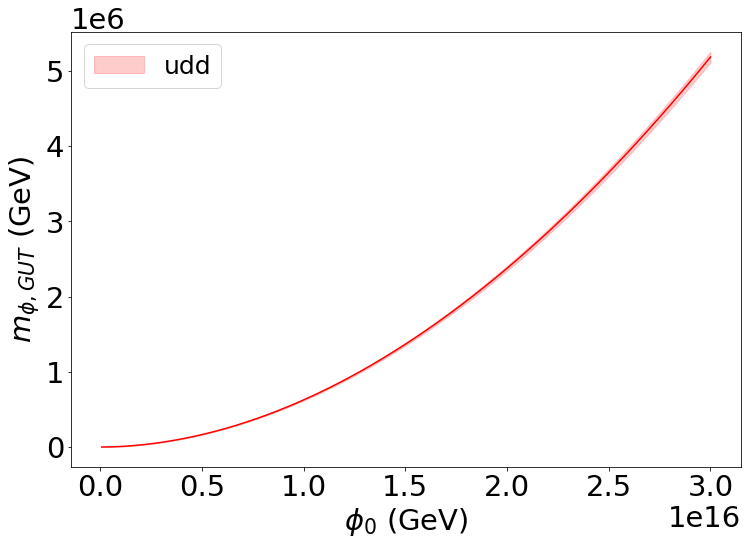

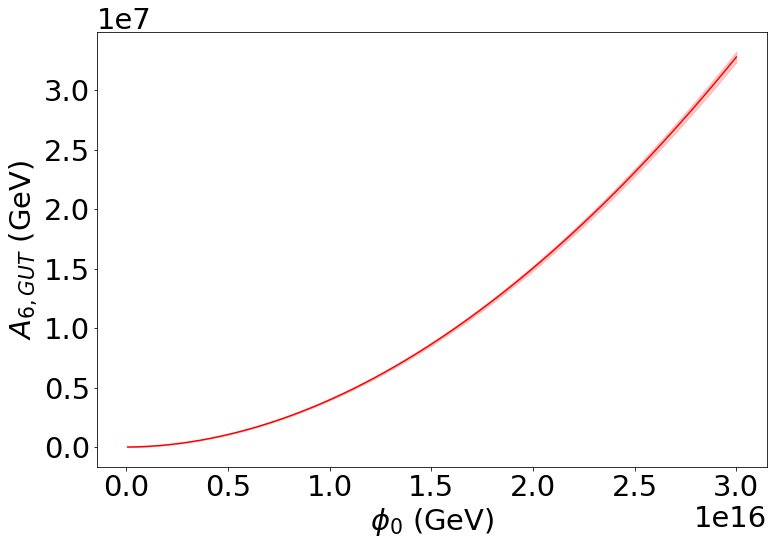

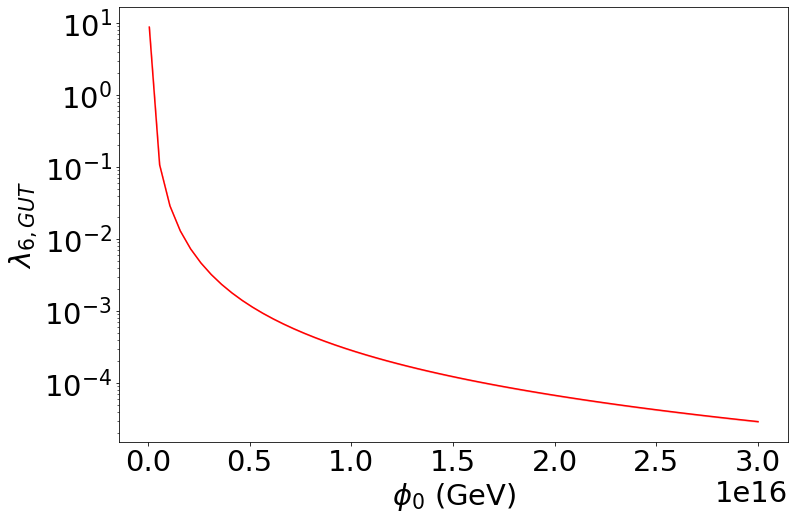

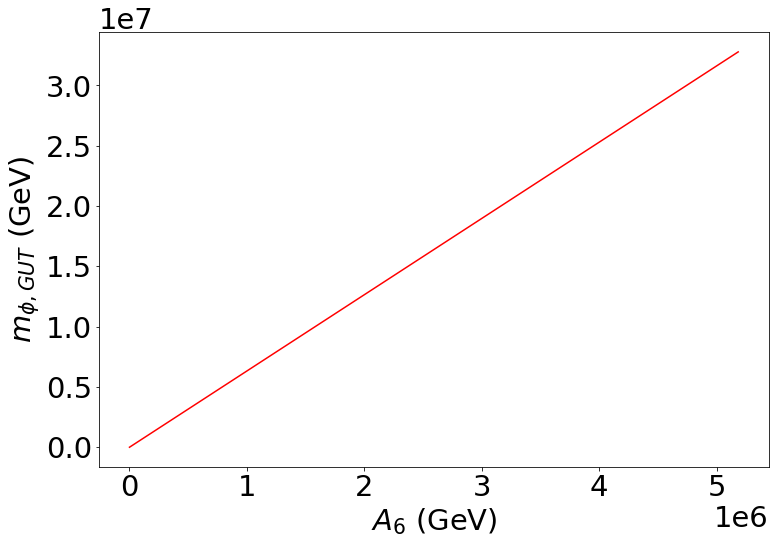

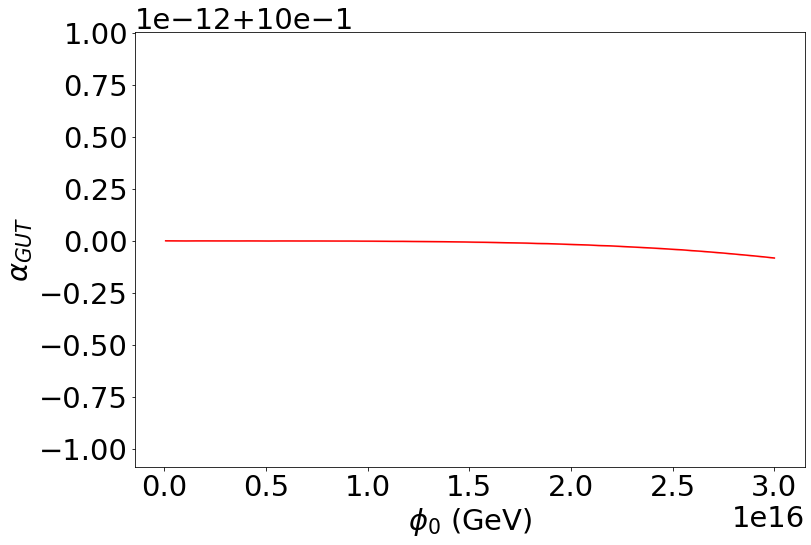

In [8]:
tree_09653_204 = pd.read_csv('tree_m0_20409490229434266_09653.csv',engine='python',dtype=str)
tree_09653_209 = pd.read_csv('tree_m0_2098903167319144_09653.csv',engine='python',dtype=str)
tree_09653_215 = pd.read_csv('tree_m0_2158502959289468_09653.csv',engine='python',dtype=str)

plt.figure(1)
plt.plot(pd_to_array(tree_09653_209, 'phi0B'), pd_to_array(tree_09653_209, 'mphi'),'red')
# plt.fill_between(pd_to_array(m0_Tree_udd_09530, 'phi0B'), pd_to_array(m0_Tree_udd_09530, 'mphi'), pd_to_array(m0_Tree_udd_09776, 'mphi'), color = 'blue', alpha=0.2, label='Tree')
plt.fill_between(pd_to_array(tree_09653_204, 'phi0B'), pd_to_array(tree_09653_204, 'mphi'), pd_to_array(tree_09653_215, 'mphi'), color='red', alpha=0.2, label='udd')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$m_{\phi,GUT}$ (GeV)')
# plt.legend(fontsize=25)
define_plot_resolution()

plt.figure(2)
plt.plot(pd_to_array(tree_09653_209, 'phi0B'), pd_to_array(tree_09653_209, 'A6'),'red')
# plt.fill_between(pd_to_array(m0_Tree_udd_09530, 'phi0B'), pd_to_array(m0_Tree_udd_09530, 'A6'), pd_to_array(m0_Tree_udd_09776, 'A6'), color = 'blue', alpha=0.2, label='Tree')
plt.fill_between(pd_to_array(tree_09653_204, 'phi0B'), pd_to_array(tree_09653_204, 'A6'), pd_to_array(tree_09653_215, 'A6'), color='red', alpha=0.2, label='udd')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$A_{6,GUT}$ (GeV)')
# plt.legend(fontsize=25)
define_plot_resolution()

plt.figure(3)
plt.plot(pd_to_array(tree_09653_209, 'phi0B'), pd_to_array(tree_09653_209, 'lambda6'),'red')
# plt.fill_between(pd_to_array(m0_Tree_udd_09530, 'phi0B'), pd_to_array(m0_Tree_udd_09530, 'lambda6'), pd_to_array(m0_Tree_udd_09776, 'lambda6'), color = 'blue', alpha=0.2, label='Tree')
plt.fill_between(pd_to_array(tree_09653_204, 'phi0B'), pd_to_array(tree_09653_204, 'lambda6'), pd_to_array(tree_09653_215, 'lambda6'), color='red', alpha=0.2, label='udd')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$\lambda_{6,GUT}$')
# plt.legend(fontsize=25)
plt.semilogy()
define_plot_resolution()

plt.figure(4)
plt.plot(pd_to_array(tree_09653_209, 'mphi'), pd_to_array(tree_09653_209, 'A6'),'red')
# plt.fill_between([], [], [], color = 'blue', alpha=0.2, label='Tree')
plt.fill_between([], [], [], color='red', alpha=0.2, label='udd')
plt.xlabel(r'$A_6$ (GeV)')
plt.ylabel(r'$m_{\phi,GUT}$ (GeV)')
# plt.legend(fontsize=25)
define_plot_resolution()

plt.figure(9)
# plt.plot(pd_to_array(m0_Tree_udd_09653, 'phi0B'), alpha(m0_Tree_udd_09653),'blue')
plt.plot(pd_to_array(tree_09653_209, 'phi0B'), alpha(tree_09653_209),'red')
# plt.fill_between(pd_to_array(m0_Tree_udd_09530, 'phi0B'), alpha(m0_Tree_udd_09530), alpha(m0_Tree_udd_09776), color = 'blue', alpha=0.2, label='Tree')
plt.fill_between(pd_to_array(tree_09653_204, 'phi0B'), alpha(tree_09653_204), alpha(tree_09653_215), color='red', alpha=0.2, label='udd')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$\alpha_{GUT}$')
# plt.legend(fontsize=25)
define_plot_resolution()


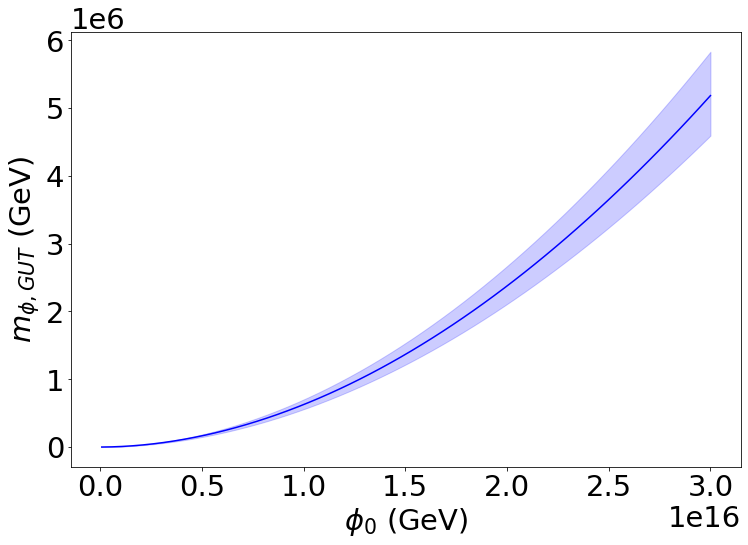

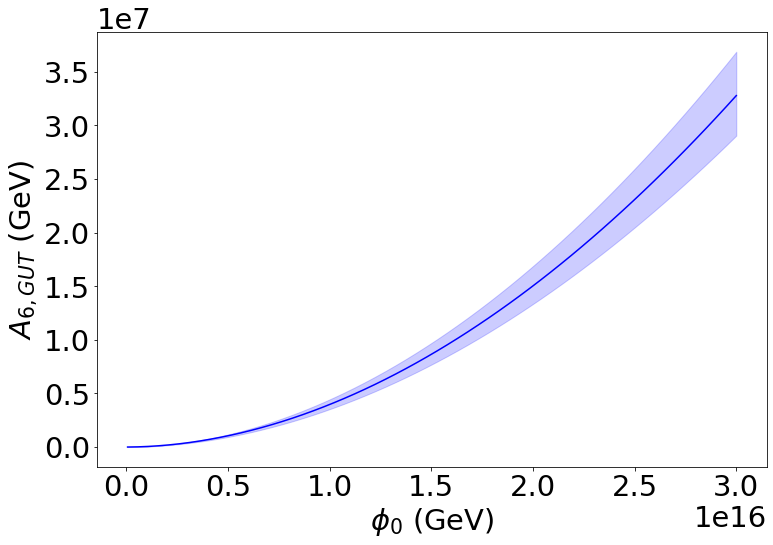

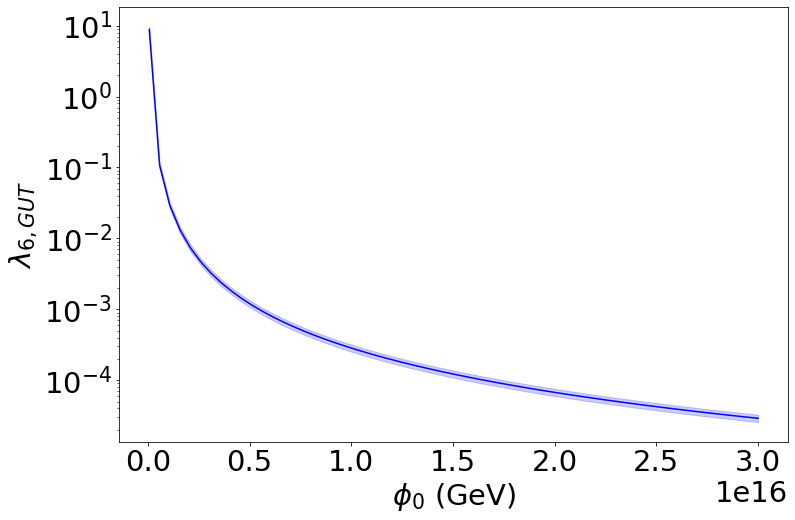

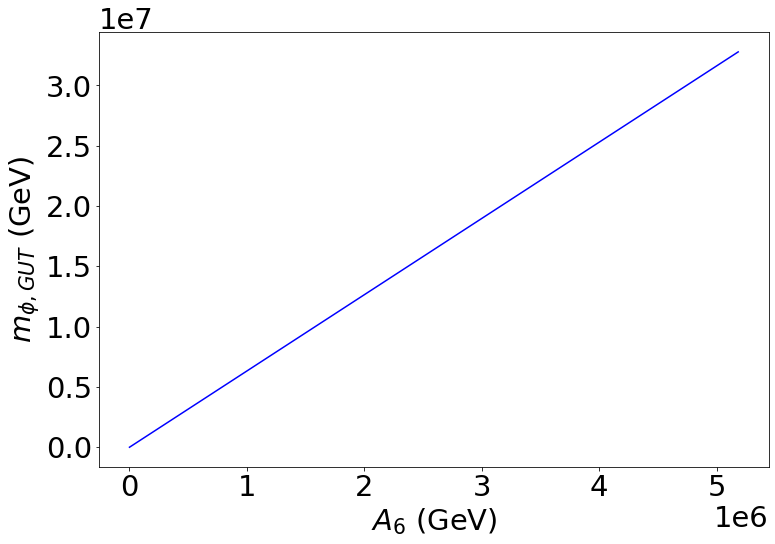

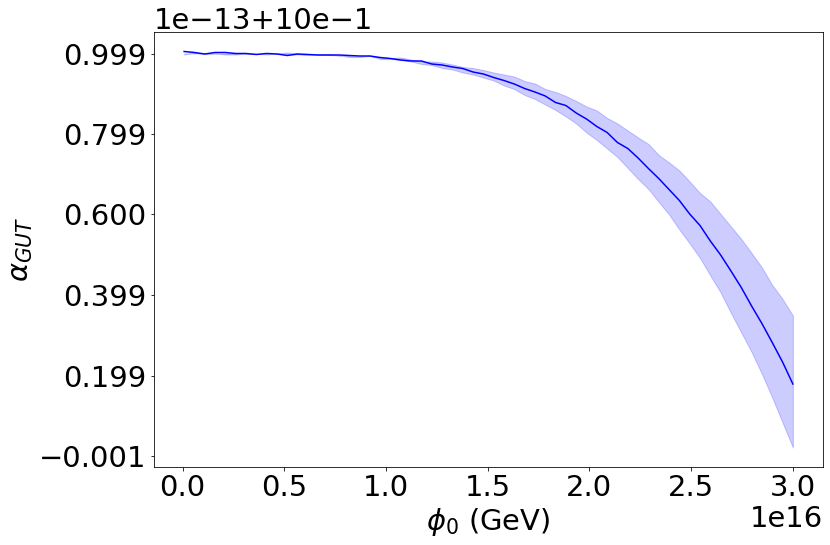

In [11]:
tree_0953_209 = pd.read_csv('tree_m0_2098903167319144_0953.csv',engine='python',dtype=str)
tree_09653_209 = pd.read_csv('tree_m0_2098903167319144_09653.csv',engine='python',dtype=str)
tree_09776_209 = pd.read_csv('tree_m0_2098903167319144_09776.csv',engine='python',dtype=str)

plt.figure(1)
plt.plot(pd_to_array(tree_09653_209, 'phi0B'), pd_to_array(tree_09653_209, 'mphi'),'blue')
# plt.fill_between(pd_to_array(m0_Tree_udd_09530, 'phi0B'), pd_to_array(m0_Tree_udd_09530, 'mphi'), pd_to_array(m0_Tree_udd_09776, 'mphi'), color = 'blue', alpha=0.2, label='Tree')
plt.fill_between(pd_to_array(tree_0953_209, 'phi0B'), pd_to_array(tree_0953_209, 'mphi'), pd_to_array(tree_09776_209, 'mphi'), color='blue', alpha=0.2, label='udd')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$m_{\phi,GUT}$ (GeV)')
# plt.legend(fontsize=25)
define_plot_resolution()

plt.figure(2)
plt.plot(pd_to_array(tree_09653_209, 'phi0B'), pd_to_array(tree_09653_209, 'A6'),'blue')
# plt.fill_between(pd_to_array(m0_Tree_udd_09530, 'phi0B'), pd_to_array(m0_Tree_udd_09530, 'A6'), pd_to_array(m0_Tree_udd_09776, 'A6'), color = 'blue', alpha=0.2, label='Tree')
plt.fill_between(pd_to_array(tree_0953_209, 'phi0B'), pd_to_array(tree_0953_209, 'A6'), pd_to_array(tree_09776_209, 'A6'), color='blue', alpha=0.2, label='udd')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$A_{6,GUT}$ (GeV)')
# plt.legend(fontsize=25)
define_plot_resolution()

plt.figure(3)
plt.plot(pd_to_array(tree_09653_209, 'phi0B'), pd_to_array(tree_09653_209, 'lambda6'),'blue')
# plt.fill_between(pd_to_array(m0_Tree_udd_09530, 'phi0B'), pd_to_array(m0_Tree_udd_09530, 'lambda6'), pd_to_array(m0_Tree_udd_09776, 'lambda6'), color = 'blue', alpha=0.2, label='Tree')
plt.fill_between(pd_to_array(tree_0953_209, 'phi0B'), pd_to_array(tree_0953_209, 'lambda6'), pd_to_array(tree_09776_209, 'lambda6'), color='blue', alpha=0.2, label='udd')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$\lambda_{6,GUT}$')
# plt.legend(fontsize=25)
plt.semilogy()
define_plot_resolution()

plt.figure(4)
plt.plot(pd_to_array(tree_09653_209, 'mphi'), pd_to_array(tree_09653_209, 'A6'),'blue')
# plt.fill_between([], [], [], color = 'blue', alpha=0.2, label='Tree')
plt.fill_between([], [], [], color='blue', alpha=0.2, label='udd')
plt.xlabel(r'$A_6$ (GeV)')
plt.ylabel(r'$m_{\phi,GUT}$ (GeV)')
# plt.legend(fontsize=25)
define_plot_resolution()

plt.figure(9)
# plt.plot(pd_to_array(m0_Tree_udd_09653, 'phi0B'), alpha(m0_Tree_udd_09653),'blue')
plt.plot(pd_to_array(tree_09653_209, 'phi0B'), alpha(tree_09653_209),'blue')
# plt.fill_between(pd_to_array(m0_Tree_udd_09530, 'phi0B'), alpha(m0_Tree_udd_09530), alpha(m0_Tree_udd_09776), color = 'blue', alpha=0.2, label='Tree')
plt.fill_between(pd_to_array(tree_0953_209, 'phi0B'), alpha(tree_0953_209), alpha(tree_09776_209), color='blue', alpha=0.2, label='udd')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$\alpha_{GUT}$')
# plt.legend(fontsize=25)
define_plot_resolution()


blue = -10, red = 0


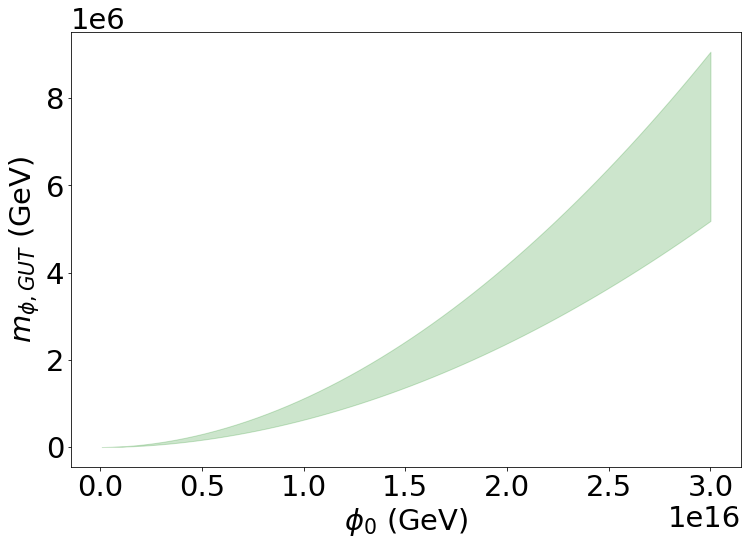

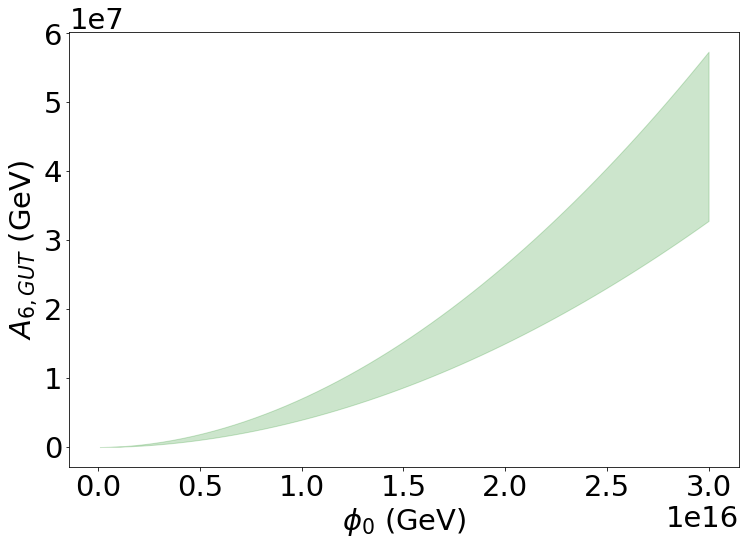

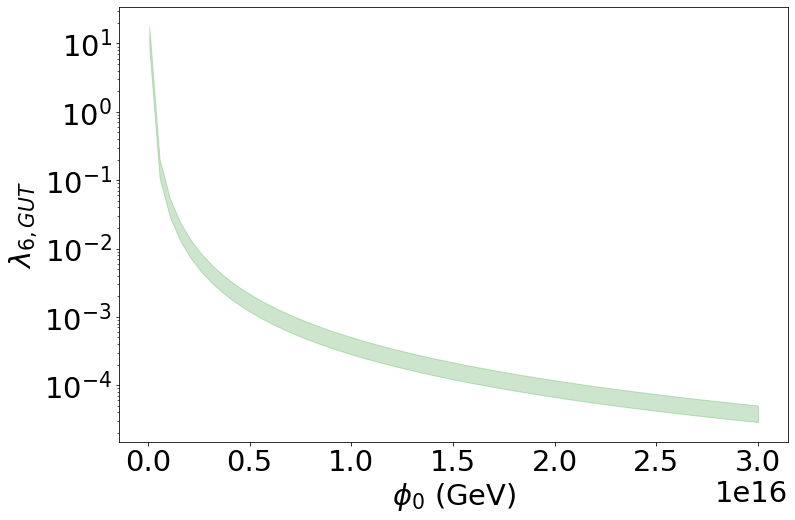

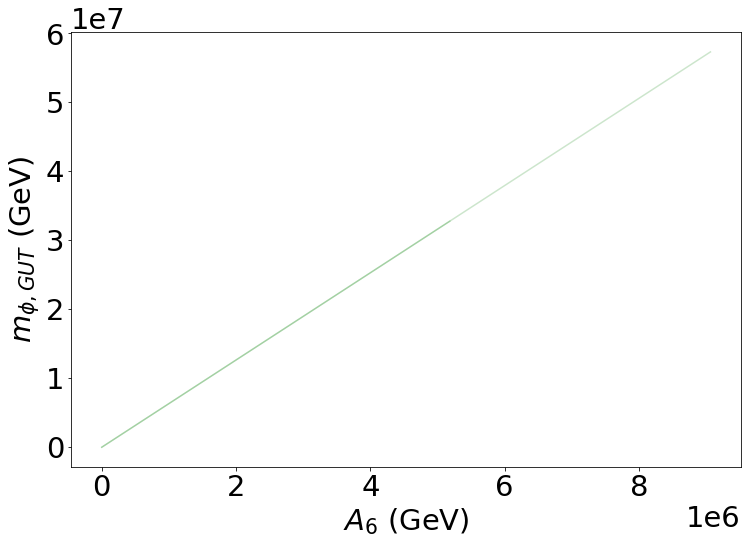

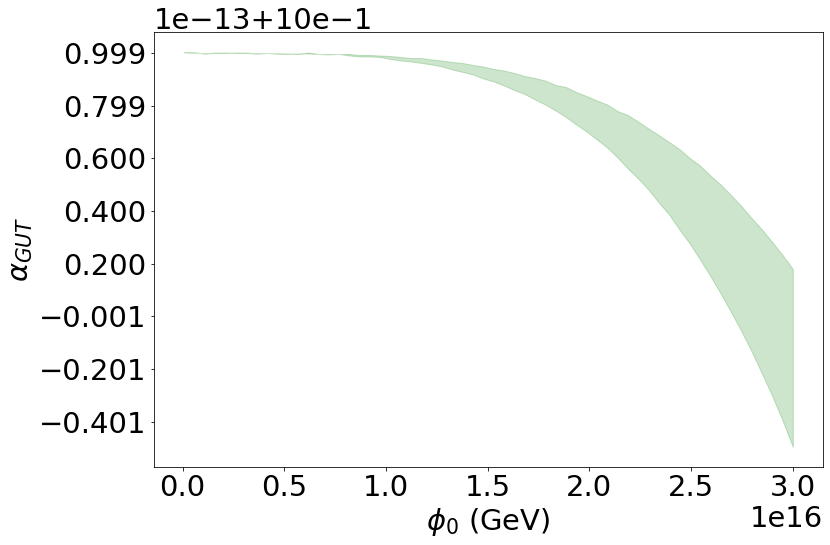

In [18]:
tree_09653_209_m10 = pd.read_csv('tree_m10_2098903167319144_09653.csv',engine='python',dtype=str)
tree_09653_209_m0 = pd.read_csv('tree_m0_2098903167319144_09653.csv',engine='python',dtype=str)

print('blue = -10, red = 0')
plt.figure(1)
plt.fill_between(pd_to_array(tree_09653_209_m10, 'phi0B'), pd_to_array(tree_09653_209_m10, 'mphi'), pd_to_array(tree_09653_209_m0, 'mphi'),color = 'green', alpha=0.2)
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$m_{\phi,GUT}$ (GeV)')
# plt.legend(fontsize=25)
define_plot_resolution()

plt.figure(2)
plt.fill_between(pd_to_array(tree_09653_209_m10, 'phi0B'), pd_to_array(tree_09653_209_m10, 'A6'), pd_to_array(tree_09653_209_m0, 'A6'),color = 'green', alpha=0.2)
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$A_{6,GUT}$ (GeV)')
# plt.legend(fontsize=25)
define_plot_resolution()

plt.figure(3)
plt.fill_between(pd_to_array(tree_09653_209_m10, 'phi0B'), pd_to_array(tree_09653_209_m10, 'lambda6'), pd_to_array(tree_09653_209_m0, 'lambda6'),color = 'green', alpha=0.2)
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$\lambda_{6,GUT}$')
# plt.legend(fontsize=25)
plt.semilogy()
define_plot_resolution()

plt.figure(4)
plt.plot(pd_to_array(tree_09653_209_m10, 'mphi'), pd_to_array(tree_09653_209_m10, 'A6'),'green', alpha=0.2)
plt.plot(pd_to_array(tree_09653_209_m0, 'mphi'), pd_to_array(tree_09653_209_m0, 'A6'),'green', alpha=0.2)
plt.xlabel(r'$A_6$ (GeV)')
plt.ylabel(r'$m_{\phi,GUT}$ (GeV)')
# plt.legend(fontsize=25)
define_plot_resolution()

plt.figure(9)
plt.fill_between(pd_to_array(tree_09653_209_m10, 'phi0B'), alpha(tree_09653_209_m10),alpha(tree_09653_209_m0),color='green', alpha=0.2)
plt.xlabel(r'$\phi_0$ (GeV)')
plt.ylabel(r'$\alpha_{GUT}$')
# plt.legend(fontsize=25)
define_plot_resolution()


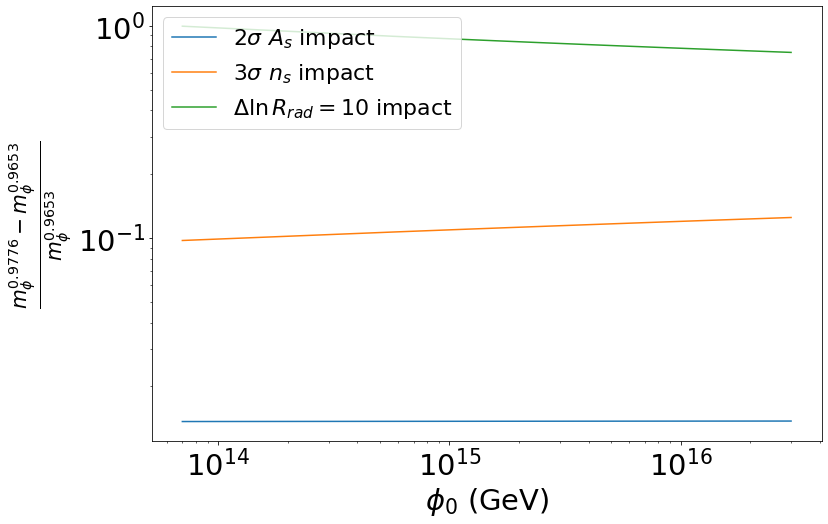

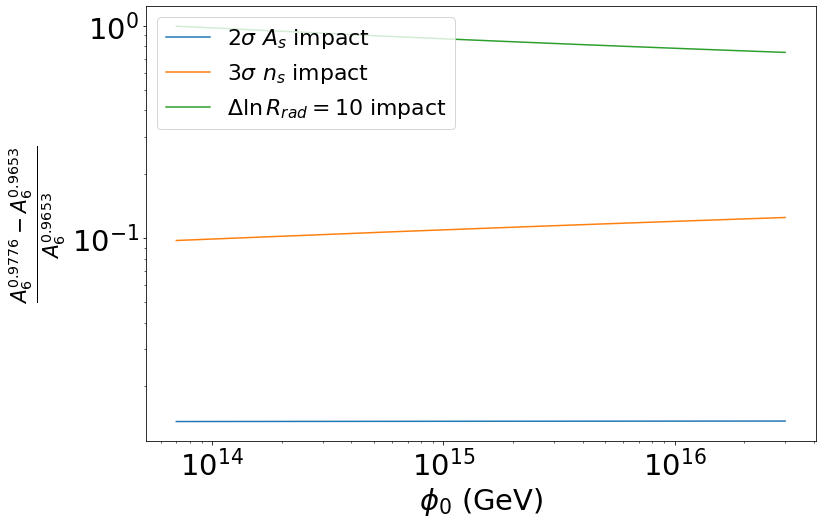

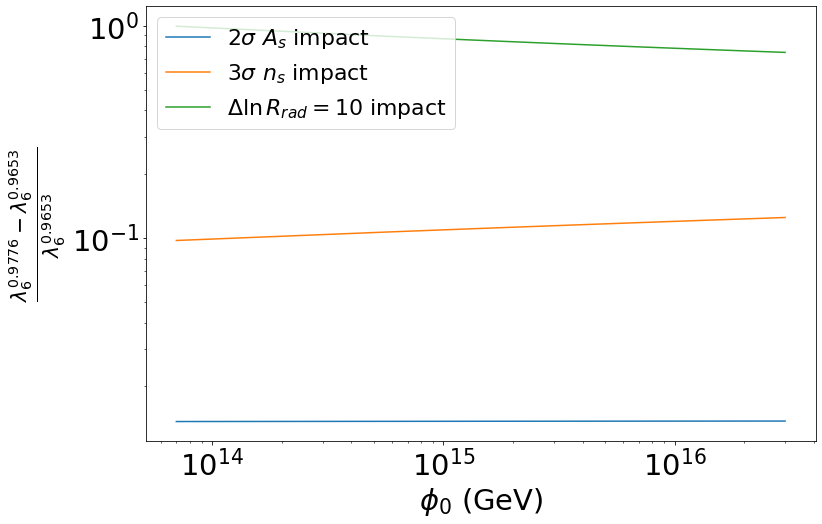

In [30]:
plt.figure(1)
plt.plot(pd_to_array(tree_09653_209, 'phi0B'), (pd_to_array(tree_09653_215, 'mphi')- pd_to_array(tree_09653_209, 'mphi'))/pd_to_array(tree_09653_209, 'mphi'), label = r'$2\sigma\ A_s$ impact')
plt.plot(pd_to_array(tree_09653_209, 'phi0B'), (pd_to_array(tree_09776_209, 'mphi')- pd_to_array(tree_09653_209, 'mphi'))/pd_to_array(tree_09653_209, 'mphi'), label = r'$3\sigma\ n_s$ impact')
plt.plot(pd_to_array(tree_09653_209_m10, 'phi0B'), (pd_to_array(tree_09653_209_m10, 'mphi')- pd_to_array(tree_09653_209_m0, 'mphi'))/pd_to_array(tree_09653_209_m0, 'mphi'), label = r'$\Delta\ln R_{rad} = 10$ impact')
plt.legend(fontsize = 22)
plt.ylabel(r'$\frac{m_\phi^{0.9776}-m_\phi^{0.9653}}{m_\phi^{0.9653}}$')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.loglog()
define_plot_resolution()

plt.figure(2)
plt.plot(pd_to_array(tree_09653_209, 'phi0B'), (pd_to_array(tree_09653_215, 'A6')- pd_to_array(tree_09653_209, 'A6'))/pd_to_array(tree_09653_209, 'A6'), label = r'$2\sigma\ A_s$ impact')
plt.plot(pd_to_array(tree_09653_209, 'phi0B'), (pd_to_array(tree_09776_209, 'A6')- pd_to_array(tree_09653_209, 'A6'))/pd_to_array(tree_09653_209, 'A6'), label = r'$3\sigma\ n_s$ impact')
plt.plot(pd_to_array(tree_09653_209_m10, 'phi0B'), (pd_to_array(tree_09653_209_m10, 'A6')- pd_to_array(tree_09653_209_m0, 'A6'))/pd_to_array(tree_09653_209_m0, 'A6'), label = r'$\Delta\ln R_{rad} = 10$ impact')
plt.legend(fontsize = 22)
plt.ylabel(r'$\frac{A_6^{0.9776}-A_6^{0.9653}}{A_6^{0.9653}}$')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.loglog()
define_plot_resolution()

plt.figure(3)
plt.plot(pd_to_array(tree_09653_209, 'phi0B'), (pd_to_array(tree_09653_215, 'lambda6')- pd_to_array(tree_09653_209, 'lambda6'))/pd_to_array(tree_09653_209, 'lambda6'), label = r'$2\sigma\ A_s$ impact')
plt.plot(pd_to_array(tree_09653_209, 'phi0B'), (pd_to_array(tree_09776_209, 'lambda6')- pd_to_array(tree_09653_209, 'lambda6'))/pd_to_array(tree_09653_209, 'lambda6'), label = r'$3\sigma\ n_s$ impact')
plt.plot(pd_to_array(tree_09653_209_m10, 'phi0B'), (pd_to_array(tree_09653_209_m10, 'lambda6')- pd_to_array(tree_09653_209_m0, 'lambda6'))/pd_to_array(tree_09653_209_m0, 'lambda6'), label = r'$\Delta\ln R_{rad} = 10$ impact')
plt.legend(fontsize = 22)
plt.ylabel(r'$\frac{\lambda_6^{0.9776}-\lambda_6^{0.9653}}{\lambda_6^{0.9653}}$')
plt.xlabel(r'$\phi_0$ (GeV)')
plt.loglog()
define_plot_resolution()

# plt.figure(4)
# plt.plot(pd_to_array(tree_09653_209, 'phi0B'), alpha(tree_09653_215)- alpha(tree_09653_209), label = r'$2\sigma\ A_s$ impact')
# plt.plot(pd_to_array(tree_09653_209, 'phi0B'), alpha(tree_09776_209)- alpha(tree_09653_209), label = r'$3\sigma\ n_s$ impact')
# plt.plot(pd_to_array(tree_09653_209_m10, 'phi0B'), alpha(tree_09653_209_m10)- alpha(tree_09653_209_m0), label = r'$\Delta\ln R_{rad} = 10$ impact')
# plt.legend(fontsize = 22)
# plt.loglog()
# define_plot_resolution()